In [1]:
from __future__ import print_function

import sys

from matplotlib import pylab as plt
import numpy as np
from scipy import stats as st
%matplotlib inline

In [2]:
def find_primes(N):
    print("Allocating lots of space")
    sys.stdout.flush()
    output = np.ones(N, dtype=bool)
    output[0] = output[1] = False
    output[4:N:2] = False
    print("Starting loop")
    sys.stdout.flush()
    for p in range(3, N, 2):
        if p % 50001 == 0:
            print(p)
            sys.stdout.flush()
        if output[p]:
            output[2*p:N:p] = False
    return output

In [3]:
N = int(2.5e9)
output_file = 'output_{}'.format(N)
"""
Ran this ahead of time

np.save(find_primes(N))
"""

'\nRan this ahead of time\n\nnp.save(find_primes(N))\n'

In [4]:
mask = np.load(output_file + '.npy')
primes = np.nonzero(mask)[0][:int(1e8)]

mask = None  # Save some space

In [5]:
num_primes = int(1e8)  # Consistent with Lemke Oliver/Sound

primes = primes[:num_primes]

In [6]:
mod_what = 3

mod = np.mod(primes, mod_what)
for first in (1, 2):
    print("mod {} first residue {} binned by second residue".format(mod_what, first))
    print(np.bincount(mod[1:][mod[:-1] == first]))

mod 3 first residue 1 binned by second residue
[       0 22332857 27665880]
mod 3 first residue 2 binned by second residue
[       1 27665880 22335380]


In [7]:
mod_what = 10

mod = np.mod(primes, mod_what)
for first in (1, 3, 7, 9):
    print("mod {} first residue {} binned by second residue".format(mod_what, first))
    print(np.bincount(mod[1:][mod[:-1] == first]))

mod 10 first residue 1 binned by second residue
[      0 4623041       0 7429438       0       0       0 7504612       0
 5442344]
mod 10 first residue 3 binned by second residue
[      0 6010981       0 4442561       0       1       0 7043695       0
 7502896]
mod 10 first residue 7 binned by second residue
[      0 6373982       0 6755195       0       0       0 4439355       0
 7431870]
mod 10 first residue 9 binned by second residue
[      0 7991431       0 6372940       0       0       0 6012739       0
 4622916]


Seems approximately in line with Lemke Oliver/Sound's paper. Off by a few. Likely due to our choices of stopping conditions. Shouldn't really affect things.

In [8]:
# But what if we do this modulo a large prime?

mod_what = 239
assert mod_what in primes

mod = np.mod(primes, mod_what)
first = 1
print("mod {} first residue {} binned by second residue".format(mod_what, first))
print(np.bincount(mod[1:][mod[:-1] == first]))

mod 239 first residue 1 binned by second residue
[    0     0     0 27343     0 27660     0 48887     0 21570     0 28011
     0 36096     0 20151     0 15123     0 27509     0 15237     0 12994
     0 19748     0  9343     0 10207     0 18346     0  5740     0  6013
     0  9924     0  4746     0  5580     0  8309     0  3443     0  2881
     0  5058     0  2922     0  2118     0  3762     0  1945     0  1559
     0  3349     0  1099     0  1005     0  1979     0   763     0  1125
     0  1189     0   565     0   577     0  1016     0   538     0   367
     0   738     0   261     0   261     0   596     0   150     0   177
     0   295     0   154     0   177     0   221     0   102     0    85
     0   155     0    98     0    78     0   131     0    37     0    57
     0    94     0    38     0    32     0    66     0    17     0    27
     0    34     0    13     0    17     0    16     0    18     0     7
     0    19     0     5     0     6     0     7     0     4     0     5
  

Ummmmmmm, that's super weird...... What's up with this "no every other" pattern? 239 is a prime.....

In [9]:
first = 2
print("mod {} first residue {} binned by second residue".format(mod_what, first))
print(np.bincount(mod[1:][mod[:-1] == first]))

mod 239 first residue 2 binned by second residue
[    0     1     0     1 27206     0 27506     0 49020     0 21756     0
 28101     0 36560     0 19972     0 15105     0 27450     0 15111     0
 13038     0 19623     0  9289     0 10112     0 18456     0  5697     0
  6030     0  9972     0  4743     0  5518     0  8363     0  3329     0
  3009     0  5092     0  2882     0  2122     0  3615     0  1861     0
  1564     0  3251     0  1081     0  1146     0  2012     0   811     0
  1200     0  1195     0   561     0   549     0   959     0   465     0
   372     0   780     0   277     0   288     0   539     0   194     0
   182     0   293     0   147     0   177     0   200     0   108     0
    85     0   150     0    79     0    90     0   116     0    45     0
    45     0    93     0    37     0    32     0    79     0    23     0
    32     0    36     0    16     0    16     0    27     0    16     0
    11     0    17     0     5     0     9     0    17     0     3     0
  

Still essentially none every other. Super super weird. Does this keep holding?

In [10]:
# Counts will end up being the counts of primes following a prime per "offset residue class", that is,
# mod mod_what, the 2nd "offset residue class" from the residue class of 17 is the residue class of 19.
# We are summing over *all* residue classes

counts = np.zeros(mod_what, dtype=np.int64)
for first in range(1, mod_what):
    counts_for_first = np.bincount(mod[1:][mod[:-1] == first])
    counts_for_first = np.hstack([counts_for_first, np.zeros(mod_what - counts_for_first.size, dtype=np.int64)])
    counts += counts_for_first[np.mod(np.arange(first, first + mod_what), mod_what)]

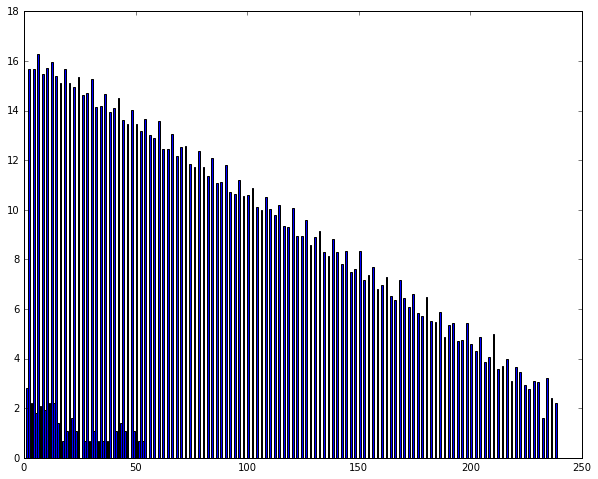

In [11]:
# And now we plot. Note the log scale on the y axis because it's quite exponential looking
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(mod_what), np.log(counts + 1));

Observations:
* There are **very** few counts in the even bins, but a few on the LHS
* Every 6th bin is super high
* That looks like a pretty linear

How officially linear?

In [12]:
st.linregress(np.arange(counts[2::2].size), np.log(counts[2::2]))

(-0.11799424195061578,
 16.335199996157751,
 -0.99562348046160565,
 2.6880000862360182e-122,
 0.0010239446748604366)

Slope of -0.11799 and a p value of 2e-122. Pretty linear. What would have happened if we had less data? Does the slope change?

In [13]:
slopes = []
for max_elts in np.logspace(10, np.log(num_primes) / np.log(2), base=2):
    max_elts = int(max_elts)
    small_counts = np.zeros(mod_what, dtype=np.int64)
    small_mod = mod[:max_elts]
    for first in range(1, mod_what):
        counts_for_first = np.bincount(small_mod[1:][small_mod[:-1] == first])
        counts_for_first = np.hstack([counts_for_first, np.zeros(mod_what - counts_for_first.size, dtype=np.int64)])
        small_counts += counts_for_first[np.mod(np.arange(first, first + mod_what), mod_what)]
    slopes.append(st.linregress(np.arange(small_counts[2::2].size), np.log(small_counts[2::2] + 1))[0])

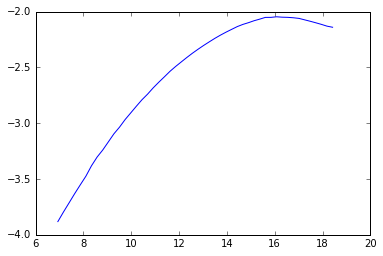

In [33]:
plt.plot(np.log(np.logspace(10, np.log(num_primes) / np.log(2), base=2)), np.log(-np.array(slopes)))

In [19]:
# But what if we do this modulo a small prime?

mod_what = 11
assert mod_what in primes

mod = np.mod(primes, mod_what)
slopes11 = []
for max_elts in np.logspace(10, np.log(num_primes) / np.log(2), base=2):
    max_elts = int(max_elts)
    small_counts = np.zeros(mod_what, dtype=np.int64)
    small_mod = mod[:max_elts]
    for first in range(1, mod_what):
        counts_for_first = np.bincount(small_mod[1:][small_mod[:-1] == first])
        counts_for_first = np.hstack([counts_for_first, np.zeros(mod_what - counts_for_first.size, dtype=np.int64)])
        small_counts += counts_for_first[np.mod(np.arange(first, first + mod_what), mod_what)]
    slopes11.append(st.linregress(np.arange(small_counts[2::2].size), np.log(small_counts[2::2] + 1))[0])

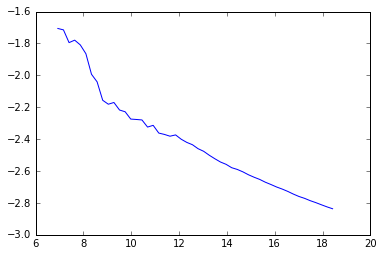

In [32]:
plt.plot(np.log(np.logspace(10, np.log(num_primes) / np.log(2), base=2)), np.log(-np.array(slopes11)))

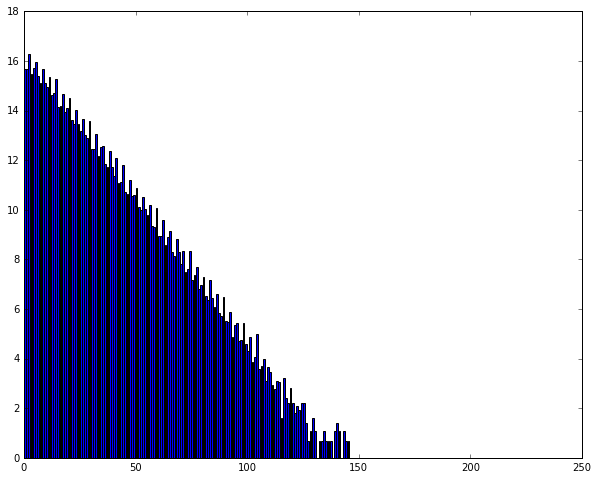

In [24]:
# Also, isn't it super weird that it looks like it continues?
mod_what = 239
idx = np.mod(np.arange(2, 3 * mod_what, 2), mod_what)[:mod_what]  # Why bother computing when you can just cut?
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(mod_what), np.log(counts[idx] + 1));

Well, maybe that's not all that great. Definitely need to exclude 0 and so forth